<a href="https://colab.research.google.com/github/EricMiao01/Python_for_Data_Analysis/blob/main/Python_%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90_NumPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NumPy**
* data munging, cleaning, subsetting, filtering, transformation
* 一般陣列演算法，例如排序、唯一化以及集合運算
* 資料對其和關聯資料處理。
* 用矩陣表達式取代 if-elif-else
* 操作群組資料

In [ ]:
import numpy as np

## **4.1 NumPy ndarray：多維陣列物件**
ndarray 是一種通用的同質資料的多維容器，意及所有的勻速型態一定要是一樣的，每個陣列都有一個 shape 以及 dtype 屬性，用來標明維度以及其元素的資料型態。

In [ ]:
# 產生隨機資料
data = np.random.randn(2, 3)
data

array([[ 0.53939495, -0.01557571,  0.57172396],
       [ 0.57583762, -0.37396559,  0.39588508]])

In [ ]:
data.shape

(2, 3)

In [ ]:
data.dtype

dtype('float64')

### **建立 ndarray**
建立陣列最簡單的方法就是使用 array 函式，它可以接受任何序列物件作為參數（包含另一個陣列），並產生新的 NumPy 陣列。

In [ ]:
data1 = [6, 7.5, 8, 9, 10]
arr1 = np.array(data1)
arr1

array([ 6. ,  7.5,  8. ,  9. , 10. ])

In [ ]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

我們可以使用 ndim 或 shape 屬性來檢查陣列

In [ ]:
arr2.ndim

2

In [ ]:
arr2.shape

(2, 4)

除非明確指明否則 ndarray 會自動為元素設定適當的資料型態

In [ ]:
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [ ]:
arr2.dtype

dtype('int64')

可以使用 zeros 或 ones 建立全部為 1 或 0 的陣列；另外也可以使用 empty 去建立擁有指定為度的陣列，但要注意其元素不見得為 0

In [ ]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
np.ones([3, 6])

array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])

In [ ]:
dim = (2, 3, 2)
np.empty(dim)

array([[[1.4292347e-316, 0.0000000e+000],
        [0.0000000e+000, 0.0000000e+000],
        [0.0000000e+000, 0.0000000e+000]],

       [[0.0000000e+000, 0.0000000e+000],
        [0.0000000e+000, 0.0000000e+000],
        [0.0000000e+000, 0.0000000e+000]]])

In [ ]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

|函式|描述|
|:---|:--|
|array|數入資料（須為序列型態），轉換為 ndarray，可以使用 dtype 明確指定元素型態，預設複製所有輸入資料|
|asarray|將數入轉為 ndarray，但如果輸入已經是一個 ndarray，則不進行資料複製|
|arange|功能同內建的 range()，只是回傳的是 ndarray|
|ones, ones_like|依照指定的 shape 和 dtype 產生全為 1 的陣列；ones_like 可以數入的另一個陣列產生 shape 和 dtype 皆相同但全為 1 的陣列|
|zeros, zeros_like|功能同上，但元素填充為 0|
|empty, empty_like|功能同上，但不填充元素|
|full, full_like|指定要填充得直，一指定的 shape 和 dtype 建立新陣列|
|eye, identity|建立 ＮxN 的單位矩陣（對角線為 1；其餘為 0）|


### **ndarray 的資料型態**

In [ ]:
arr = np.arange(5)
arr.dtype

dtype('int64')

In [ ]:
float_arr = arr.astype(np.float64)
float_arr.dtype

dtype('float64')

In [ ]:
arr = np.array([3.7, -1.2, -2.6, 0.5])
arr

array([ 3.7, -1.2, -2.6,  0.5])

In [ ]:
# 浮點數轉換成整數：小數部分會被截掉
arr.astype(np.int32)

array([ 3, -1, -2,  0], dtype=int32)

### **NumPy 陣列的算術運算**

In [ ]:
arr = np.array([[1, 2, 3], [4, 5, 6]])
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
arr * arr

array([[ 1,  4,  9],
       [16, 25, 36]])

In [ ]:
arr - arr

array([[0, 0, 0],
       [0, 0, 0]])

In [ ]:
# 若與常數運算的話是對每個元素都操作同樣的運算
arr + 1

array([[2, 3, 4],
       [5, 6, 7]])

In [ ]:
# 對兩個相等大小的陣列進行比較的話，就會產生出一個布林陣列
arr2 = np.array([[0., 4., 1.], [7, 2, 12.]])
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [ ]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

### **基本索引和切片**

In [ ]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
arr[5]

5

In [ ]:
arr[5:8]

array([5, 6, 7])

In [ ]:
arr[5:8] = 12

In [ ]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

若將長數值指定給某個切片的話，該常值就會傳播到整個切片區域。<br>
**這裡和 Python 內建 list 有個重要的區分：陣列切片是在原來的陣列上建立一個 view 而已，意思是資料其實是同一份，並且在切片上修該資料的話會同時修改到原來陣列的內容！**

In [ ]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

In [ ]:
arr_slice[1] = 13
arr

array([ 0,  1,  2,  3,  4, 12, 13, 12,  8,  9])

更高維度的操作

In [ ]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [ ]:
arr2d[2]

array([7, 8, 9])

In [ ]:
arr2d[0, 2]

3

In [ ]:
arr2d[0, 1:]

array([2, 3])

In [ ]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [ ]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
old_values = arr3d[0].copy()
arr3d[0] = 42

In [ ]:
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [ ]:
arr3d[0] = old_values

In [ ]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [ ]:
arr3d[0, 0, 2]

3

### **使用切片作為索引**

In [ ]:
arr2d = np.arange(9).reshape((3, 3)) + 1
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [ ]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

### **布林索引**

In [ ]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)

In [ ]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [ ]:
data

array([[ 0.63425026,  0.5166234 ,  0.44849297,  0.67670189],
       [ 0.91111078,  1.21696097, -0.65092446, -0.15990578],
       [ 0.06735058, -0.77097742, -0.92553789, -1.55873221],
       [-0.92984972,  1.34970395, -0.46106221, -0.01436746],
       [-1.49127542, -1.35239702,  0.89053788, -0.39857679],
       [-1.35389166, -0.19998722,  1.31826922, -1.29036819],
       [-1.56350835,  0.60329418, -0.10916375,  0.60872404]])

In [ ]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [ ]:
data[names == 'Bob']

array([[ 0.63425026,  0.5166234 ,  0.44849297,  0.67670189],
       [-0.92984972,  1.34970395, -0.46106221, -0.01436746]])

In [ ]:
data[names == 'Bob', 2:]

array([[ 0.44849297,  0.67670189],
       [-0.46106221, -0.01436746]])

In [ ]:
data[names == 'Bob', 3]

array([ 0.67670189, -0.01436746])

In [ ]:
# 若要選取相反遙見可以使用 != 或是 ~
data[~(names == 'Bob')]

array([[ 0.91111078,  1.21696097, -0.65092446, -0.15990578],
       [ 0.06735058, -0.77097742, -0.92553789, -1.55873221],
       [-1.49127542, -1.35239702,  0.89053788, -0.39857679],
       [-1.35389166, -0.19998722,  1.31826922, -1.29036819],
       [-1.56350835,  0.60329418, -0.10916375,  0.60872404]])

In [ ]:
# 多條件時可以使用集合運算子 & （且）；|（或）
mask = (names == 'Bob') | (names == 'Will')

In [ ]:
mask

array([ True, False,  True,  True,  True, False, False])

In [ ]:
data[mask]

array([[ 0.63425026,  0.5166234 ,  0.44849297,  0.67670189],
       [ 0.06735058, -0.77097742, -0.92553789, -1.55873221],
       [-0.92984972,  1.34970395, -0.46106221, -0.01436746],
       [-1.49127542, -1.35239702,  0.89053788, -0.39857679]])

### **花式索引**

In [ ]:
arr = np.empty((8, 4))

In [ ]:
for i in range(8):
    arr[i] = i

In [ ]:
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [ ]:
# 若想按照特定順序選取列，可以傳入一個指定順序的 list 或 ndarray
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [ ]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [ ]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [ ]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

上面的程式碼實際上是將 (1, 0) (5, 3) (7, 1) (2, 2) 的元素取出，**而非下列這種的方形區域**

In [ ]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

### **轉置陣列及軸交換**

In [ ]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [ ]:
# 計算內積
arr = np.random.randn(6, 3)
arr

array([[-1.98500066,  0.3378911 , -0.25096385],
       [ 0.12544453,  0.50036039, -0.82368797],
       [ 0.21192079,  1.62769846,  0.0262447 ],
       [ 2.52778623,  0.15801244,  1.23229038],
       [-0.8822878 ,  1.04969354, -0.87680984],
       [ 1.44194054, -0.41962663, -0.61939602]])

In [ ]:
# 3*6 dot 6*3 -> 3*3
np.dot(arr.T, arr)

array([[13.24820189, -1.39479024,  3.39583109],
       [-1.39479024,  4.31684414, -0.91997017],
       [ 3.39583109, -0.91997017,  3.41312   ]])

若要對付更高維度的陣列，transpose 方法可以接受軸編號 tuple，以這個 tuple 來排列軸

In [ ]:
arr = np.arange(16).reshape((2, 2, 4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [ ]:
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

在上述的例子中軸的次序變成第二軸優先，然後第一軸次之，最次才是第三軸

## **4.2 全域函示：快速元素級別陣列函示**
全域函示是一種對 ndarray 裡的資料執行元素級別運算的涵式，也稱 *ufunc*

In [ ]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [ ]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

上述為一元 *ufun*；下列則為二元全域函式的例子

In [ ]:
x = np.random.randn(8)
y = np.random.randn(8)
print(x)
print(y)

[ 0.17213918 -0.08294056 -1.69874988  0.4485624   0.01265333  0.05844292
  1.21342045  0.09304705]
[-0.51788486  0.54324798 -0.42095718 -0.08554914  1.1859551  -0.44626722
  0.46233021 -0.50758767]


In [ ]:
np.maximum(x, y)

array([ 0.17213918,  0.54324798, -0.42095718,  0.4485624 ,  1.1859551 ,
        0.05844292,  1.21342045,  0.09304705])

modf 為 python 內建 divmod 的向量版本

In [ ]:
arr = np.random.randn(7) * 5
arr

array([ 3.14686701,  3.51224282,  0.33693134, -0.10158987, -3.37379271,
       12.1468547 , -4.4506608 ])

In [ ]:
remainder, whole_part = np.modf(arr)

In [ ]:
remainder

array([ 0.14686701,  0.51224282,  0.33693134, -0.10158987, -0.37379271,
        0.1468547 , -0.4506608 ])

In [ ]:
whole_part

array([ 3.,  3.,  0., -0., -3., 12., -4.])

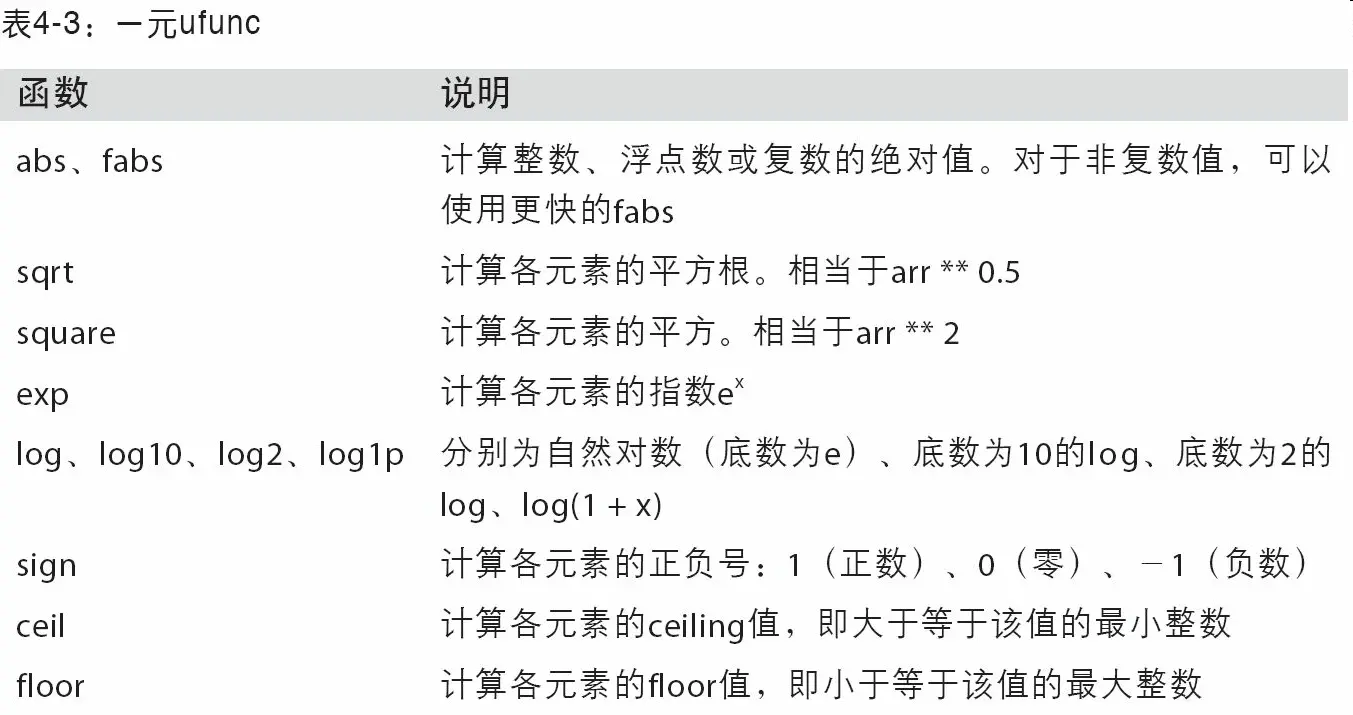

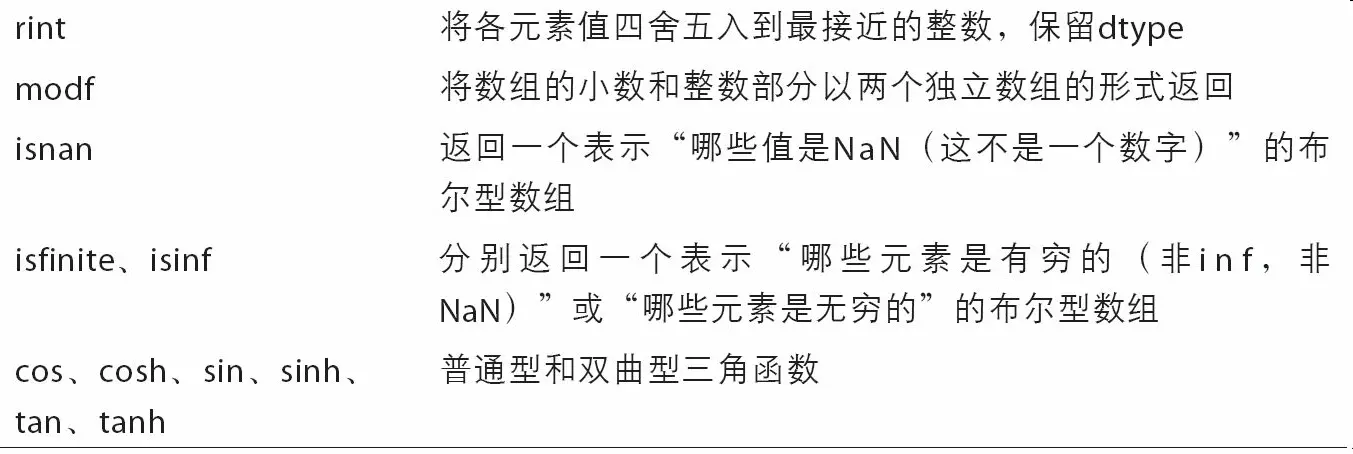

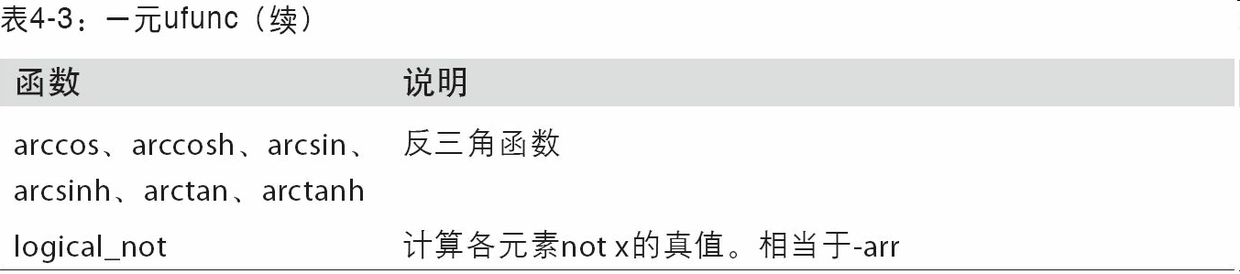

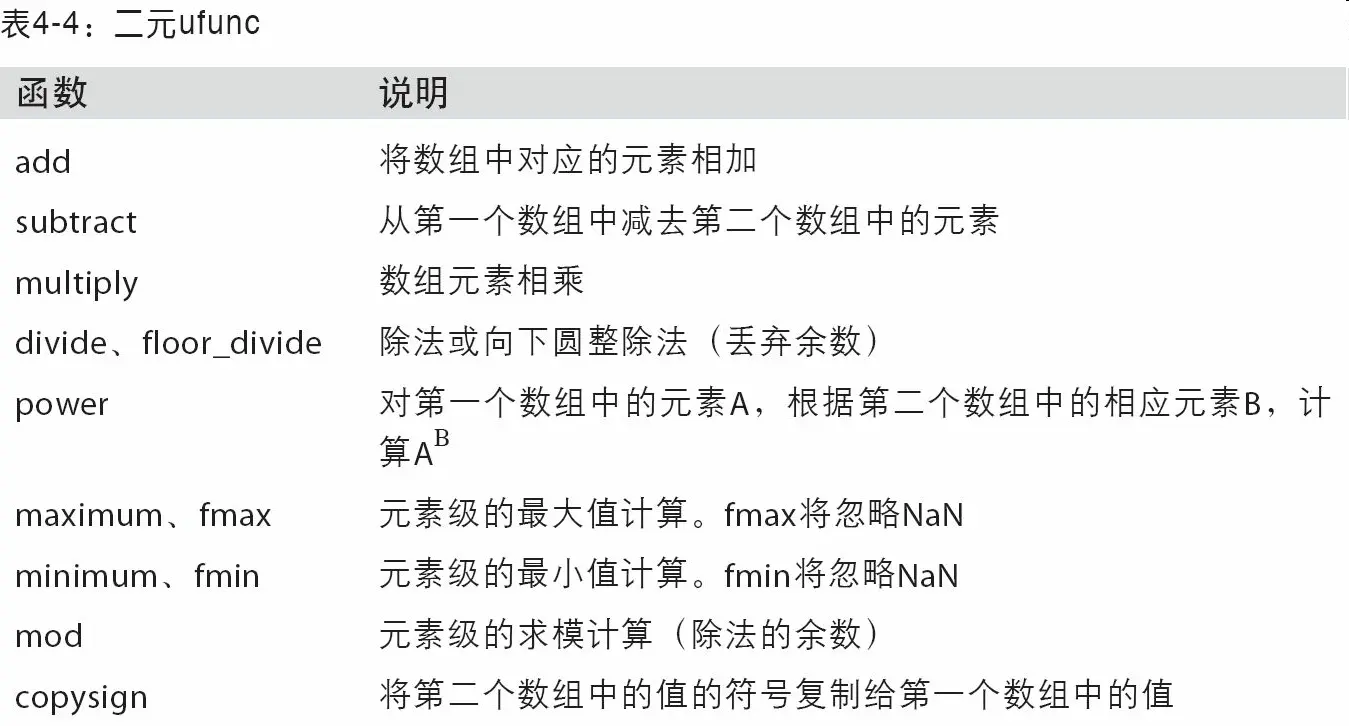

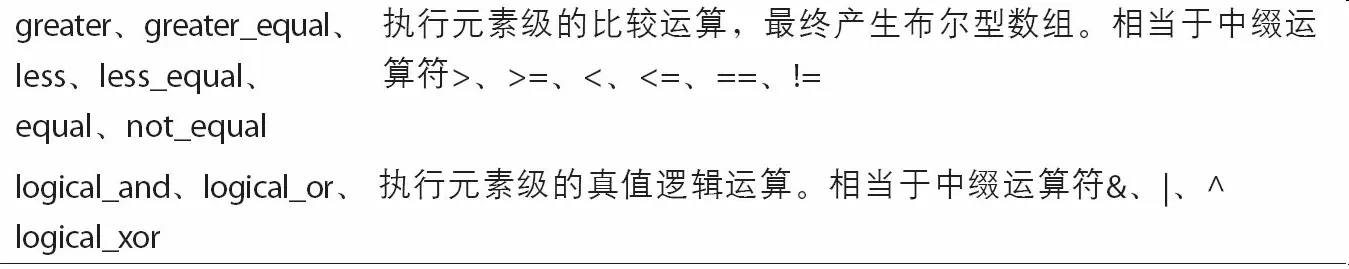

## **4.3 用陣列寫陣列導向程式**

In [ ]:
points = np.arange(-5, 5, 0.01) # 1000個等距點

In [ ]:
# np.meshgrid 接受一維陣列參數並產生出兩個二維矩陣，
# 這兩個二維矩陣能將原來兩個陣列中所有元素配對成一組組 (x, y)
xs, ys = np.meshgrid(points, points)

In [ ]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [ ]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [ ]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

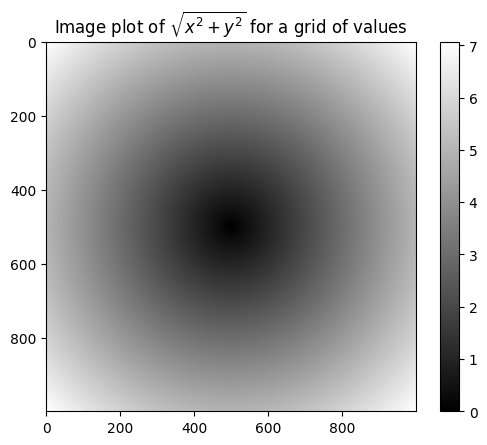

In [ ]:
import matplotlib.pyplot as plt
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")
plt.imshow(z, cmap = plt.cm.gray); plt.colorbar()

### **用陣列運算表達條件邏輯**
numpy.where 函式是 x if condition else y 這個三元表達式的向量版本

In [ ]:
x_arr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
y_arr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond= np.array([True, False, True, True, False])

In [ ]:
result = [(x if c else y) for x, y, c in zip(x_arr, y_arr, cond)]
result = np.array(result)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [ ]:
result = np.where(cond, x_arr, y_arr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

假設資料處理有一筆隨機資料，我們想要將其正值改為 2，其負值改為 -2

In [ ]:
arr = np.random.randn(4, 4)
arr

array([[ 2.12546928, -0.23661009,  1.54858314,  0.77565445],
       [-0.78290122, -0.31128321,  0.21290249, -1.48438525],
       [-0.21060062, -0.03314469, -0.42339897,  0.12563072],
       [ 0.26937464, -0.02252154,  0.76299951, -0.13281606]])

In [ ]:
np.where(arr > 0, 2, -2)

array([[ 2, -2,  2,  2],
       [-2, -2,  2, -2],
       [-2, -2, -2,  2],
       [ 2, -2,  2, -2]])

In [ ]:
# 也可以讓負值維持原值
np.where(arr > 0, 2, arr)

array([[ 2.        , -0.23661009,  2.        ,  2.        ],
       [-0.78290122, -0.31128321,  2.        , -1.48438525],
       [-0.21060062, -0.03314469, -0.42339897,  2.        ],
       [ 2.        , -0.02252154,  2.        , -0.13281606]])

### **數學和統計方法**

In [ ]:
arr = np.random.randn(5, 4)
arr

array([[-0.83849443, -1.52633301, -0.13786124, -1.32415332],
       [-0.85643972,  0.90262374,  0.11406012, -0.72329755],
       [-0.25535335, -0.48807108,  1.0369521 , -1.51091831],
       [-0.37174561,  0.14754367,  0.37905145,  1.41831576],
       [-0.08504337, -0.1292256 ,  1.38024606,  0.0846302 ]])

In [ ]:
arr.mean()

-0.13917567476932374

In [ ]:
np.mean(arr)

-0.13917567476932374

In [ ]:
arr.sum()

-2.783513495386475

In [ ]:
np.sum(arr)

-2.783513495386475

像是 sum() mean() 這種函式可以接受 axis 指定軸方向計算統計資料

In [ ]:
arr = np.arange(10).reshape((5, 2))
arr

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [ ]:
arr.mean(axis = 1)

array([0.5, 2.5, 4.5, 6.5, 8.5])

In [ ]:
arr.sum(axis = 0)

array([20, 25])

cumsum 和 cumprod 不會做聚合，會回傳結果陣列

In [ ]:
arr = np.arange(9).reshape(3, 3)
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [ ]:
arr.cumsum(axis = 0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [ ]:
arr.cumprod(axis = 1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

### **其他方法**

In [ ]:
# 排序
arr = np.random.randn(6)
arr

array([-0.79053555, -0.79227554,  1.24923066,  0.01693268, -0.38684048,
        0.00902032])

In [ ]:
arr.sort()
arr

array([-0.79227554, -0.79053555, -0.38684048,  0.00902032,  0.01693268,
        1.24923066])

In [ ]:
# unique (distinct)
names = np.array(['Bob', 'Joe', 'Will', 'Bob'])
names

array(['Bob', 'Joe', 'Will', 'Bob'], dtype='<U4')

In [ ]:
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

## **4.4 從檔案輸入或輸出值到陣列**

In [ ]:
arr = np.arange(10)
np.save('some_array', arr)

In [ ]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# 儲存多個陣列，可以得到一個 dict-like object
np.savez('array_archive', a=arr, b=arr)

In [ ]:
arch = np.load('array_archive.npz')
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## **4.5 線性代數**

In [ ]:
x = np.arange(6).reshape(2, 3) + 1
x

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
y = np.array([[6, 23], [-1, 7], [8, 9]], dtype=np.float64)
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [ ]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [ ]:
x @ y

array([[ 28.,  64.],
       [ 67., 181.]])

## **4.6 生成偽隨機數**

In [ ]:
samples = np.random.normal(size = (4, 4))
samples

array([[ 0.49659479,  0.69878467,  1.46067169, -0.56039082],
       [-1.09154906, -1.02462787,  0.99394227,  0.98098087],
       [ 1.12397544,  0.04277027, -0.3271453 ,  2.13622339],
       [ 0.64785222,  0.02508981, -1.3042009 ,  1.26197891]])

|函式|描述|
|:-|:-|
|seed|設定涮物產生器種子|
|permutation|回傳一個打亂過的序列，或是打亂過的陣列|
|shuffle|以 in-place 的方式打亂一個序列|
|rand|從均勻分布中抽取樣本|
|randn|從標準常態分配中抽取樣本|
|randint|指低到高區間並從中抽取整數樣本|
|binomial|從二項分布中抽取樣本|
|normal|從常態分布中抽取樣本|
|beta|從 beta 中抽取樣本|
|chisquare|同理|
|gamma|同理|
|uniform|從均勻分布 [0, 1) 中抽取樣本|


## **4.7 模擬隨機漫步**

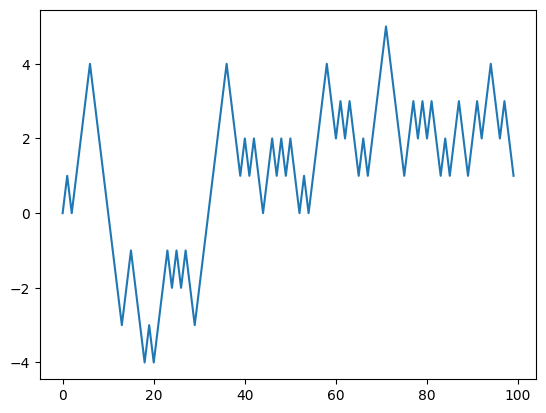

In [ ]:
# 以純 python 示範：
import random

position = 0
walk = [position]

steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

plt.plot(walk[:100])

實際上 walk 其實就是把隨機的每一步加總，也可以被當作陣列來運算，就像我用 np.random 模組連續投擲硬幣 10000 次，正面為 1 反面為 -1，然後計算累加總數

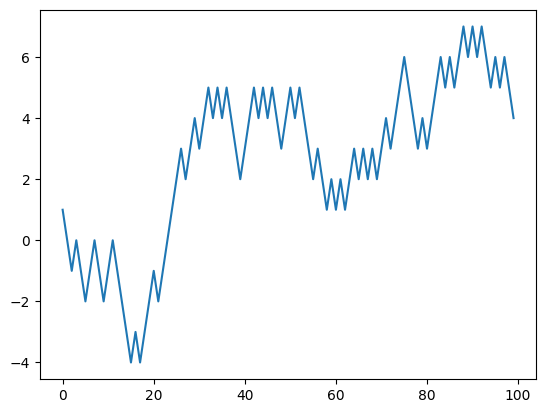

In [ ]:
n_steps = 1000
draws = np.random.randint(0, 2, size = n_steps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

plt.plot(walk[:100])

In [ ]:
# 尋找首次穿越時間：走多少部後可以達到我們想要的指定值
(np.abs(walk) >= 10).argmax() # 尋找何時達到 10 或 -10 遠的地方
# argmax() 回傳最大值所在位置（重複的話會回穿第一個出現的位置）

227

In [ ]:
walk[20]

-1

### **一次模擬許多隨機漫步過程**

In [ ]:
nwalks = 5000 # 模擬 5000 次隨機漫步
nsteps = 1000 # 每個隨機漫步都走 1000 步
draws = np.random.randint(0, 2, size = (nwalks, nsteps))
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(axis = 1)
walks

array([[  1,   2,   3, ..., -18, -17, -16],
       [  1,   0,  -1, ...,   6,   7,   8],
       [ -1,  -2,  -1, ...,  44,  43,  42],
       ...,
       [  1,   2,   3, ...,  16,  15,  16],
       [  1,   2,   3, ..., -48, -47, -46],
       [  1,   0,  -1, ..., -46, -45, -44]])

In [ ]:
walks.shape

(5000, 1000)

In [ ]:
# 想知道 5000 次模擬裡面有多少次走到了 30 步
hist30 = (np.abs(walks) >= 30).any(1) # 按照 1 軸檢查有無 True

In [ ]:
hist30.sum()

3406

In [ ]:
# 計算平均穿越時間
crossing_times = (np.abs(walks[hist30]) >= 30).argmax(axis = 1)
crossing_times.shape

(3406,)